<a href="https://colab.research.google.com/github/jhk990602/datapractice/blob/main/SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#양성클래스(타깃 = 1) 일때 손실은 -log(예측확률)로 계산. 확률이 1에서 멀어질수록 손실은 아주 큰 양수가 된다. 음성클래스(타깃=0) 일때 손실은 -log(1-예측확률)로 계산 이 예측 확률이 0에서 멀어질수록 손실은 아주 큰 양수가 된다.

In [2]:
#SGDClassifier
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

In [3]:
#Species열을 제외한 나머지 5개는 입력 데이터로 사용, Species 열은 타깃 데이터로 사용할것임
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish[['Species']].to_numpy()

In [4]:
#사이킷런의 train_test_split()함수를 사용해 이 데이터를 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

In [6]:
#훈련세트와 테스트 세트의 특성을 표준화 전처리>>> 꼭 훈련세트에서 학습한 통계 값으로 테스트 세트도 변환해야한다.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
#사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스는 SGDClassifier
from sklearn.linear_model import SGDClassifier

In [8]:
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42) #loss는 손실함수의 종류를 지정, loss='log'로 지정하여 로지스틱 손실함수 지정, max_iter는 수행할 에포크횟수지정>10회반복
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target)) #정확도 점수 출력
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [9]:
#확률적 경사 학아법은 점진적 학습이 가능, SGDClassifier를 다시 만들지 않고 훈련한 모델 sc를 추가로 더 훈련
sc.partial_fit(train_scaled, train_target) #모델을 이어서 훈련할 때는 partial_fit()메서드를 사용
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


아직 점수가 낮지만 에포크를 한 번 더 실행하니 점수가 향상됨. 그러나 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있음.

In [10]:
#partial_fit() 메서드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해주어야 함 이를 위해 np.unique() 함수로 train_target에 있는 7개 생선 목록을 만듬
#과대적합이 시작하기 전에 훈련을 멈추는 조기종료라고함. 조기종료 시점 나타내는 그래프만들기
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [12]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled,test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

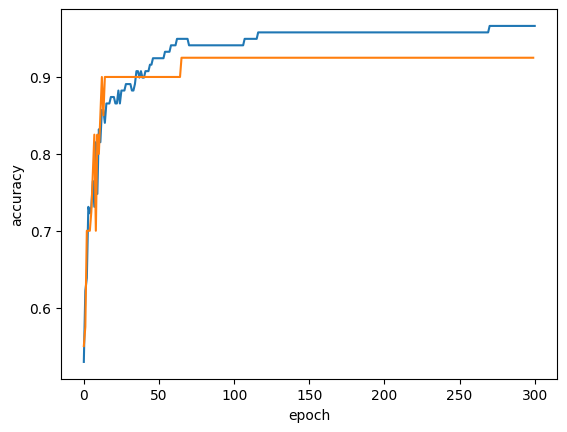

In [13]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

100번째 에포크 이후에는 훈련세트와 테스트세트의 점수가 조금씩 벌어짐. 에포크 초기에는 과소적합되어 훈련 세트와 테스트세트의 점수가 낮음> 100번째 에포크가 적절한 반복횟수로 추정됨

In [15]:
#SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤. tol 매개변수에서 향상될 최솟값을 지정> 코드에서는 tol매개변수를 None으로 지정하여 max_iter=100만큼 무조건 반복하도록함
sc = SGDClassifier(loss = 'log', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
#loss 매개변수의 기본값은 'hinge' 힌지 손실은 서포트 벡터 머신이라는 머신러닝 알고리즘을 위한 손실함수, 그러나 SGDClassifier가 여러 종류의 손실 함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원
#힌지손실을 사용해 간은 반복 횟수동안 모델훈련
sc = SGDClassifier(loss = 'hinge',max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
